In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Create an empty undirected graph 
G = nx.Graph()

# Define the corrected list of edges
#edges = [('v0', 'v1'), ('v0', 'v2'), ('v1', 'v2'), ('v1', 'v3'),('v2', 'v4'), ('v2', 'v5') ]
# Define the corrected list of edges
edges = [(0, 1), (0, 2), (1, 2), (1, 3),(2, 4), (2, 5)]
# Add edges to the graph
G.add_edges_from(edges)

- Calcul de la distance entre le noeud et le barycentre .( la formule  )


In [4]:
def calculate_distance(graph, node_position):
    distances = {}
    
    for node in graph.nodes():
        neighbors = list(graph.neighbors(node))
        nb = len(neighbors)
        
        # Ajouter 1 pour chaque voisin et inclure l'index du nœud lui-même
        # Utiliser un ensemble pour des recherches plus rapides
        neighbor_set = set(neighbors)
        neighbor_set.add(node)
        
        # Calculer la distance en utilisant une compréhension de liste
        distance_vk = 1 / (nb + 1) * sum(node_position.index(neighbor) for neighbor in neighbor_set)
        
        distances[node] = distance_vk
    
    return distances



In [5]:
# Fonction pour transformer le tableau Ti en Ti+1
#nodes are arranged in ascending order according to their distances. 
#Nodes with smaller distances come first in the sorted order, while nodes with larger distances come later.
def transform_layout(graph, table):
    distances = calculate_distance(graph, table)
    
    # Sort nodes based on distances
    sorted_nodes = sorted(distances, key=distances.get)
    
    return sorted_nodes


In [6]:
# Disposition initiale T0
#T0 = ['v0', 'v2', 'v4', 'v5', 'v3', 'v1']
T0 = [0, 2, 4, 5, 3, 1]

In [7]:
distance_T0 = calculate_distance(G, T0)
print("Distances pour T0:", distance_T0)

# Transformation de T0 à T1
T1 = transform_layout(G, T0)
print('Le nouveau T1=',T1)

distances_T1 = calculate_distance(G, T1)
print("Distances pour T1:", distances_T1)

# Transformation de T1 à T2
T2 = transform_layout(G, T1)
print('Le nouveau T2=',T2)
distances_T2 = calculate_distance(G, T2)
print("Distances pour T2:", distances_T2)

# Transformation de T2 à T3
T3 = transform_layout(G, T2)
print('Le nouveau T3=',T3)

distances_T3 = calculate_distance(G, T3)
print("Distances pour T3:", distances_T3)

# Transformation de T3 à T4
T4 = transform_layout(G, T3)
print('Le nouveau T4=',T4)
distances_T4 = calculate_distance(G, T4)
print("Distances pour T4:", distances_T4)

# Transformation de T4 à T5
T5 = transform_layout(G, T4)
print('Le nouveau T5=',T5)
distances_T5 = calculate_distance(G, T5)
print("Distances pour T5:", distances_T5)


Distances pour T0: {0: 2.0, 1: 2.5, 2: 2.2, 3: 4.5, 4: 1.5, 5: 2.0}
Le nouveau T1= [4, 0, 5, 2, 1, 3]
Distances pour T1: {0: 2.6666666666666665, 1: 3.25, 2: 2.0, 3: 4.5, 4: 1.5, 5: 2.5}
Le nouveau T2= [4, 2, 5, 0, 1, 3]
Distances pour T2: {0: 2.6666666666666665, 1: 3.25, 2: 2.0, 3: 4.5, 4: 0.5, 5: 1.5}
Le nouveau T3= [4, 5, 2, 0, 1, 3]
Distances pour T3: {0: 3.0, 1: 3.5, 2: 2.0, 3: 4.5, 4: 1.0, 5: 1.5}
Le nouveau T4= [4, 5, 2, 0, 1, 3]
Distances pour T4: {0: 3.0, 1: 3.5, 2: 2.0, 3: 4.5, 4: 1.0, 5: 1.5}
Le nouveau T5= [4, 5, 2, 0, 1, 3]
Distances pour T5: {0: 3.0, 1: 3.5, 2: 2.0, 3: 4.5, 4: 1.0, 5: 1.5}


Generalisation

In [8]:
def arc_diagram_algorithm(graph, initial_layout, max_iterations=100, convergence_threshold=0.001):
    
    layout = initial_layout.copy()
    
    for i in range(max_iterations):
        new_layout = transform_layout(graph, layout)
        distances = calculate_distance(graph, new_layout)
        layout = new_layout
        if max(distances.values()) - min(distances.values()) < convergence_threshold:
            break
        
    return layout

In [9]:
Tf = arc_diagram_algorithm(G,T0)

print("Résultat final du diagramme en arcs:", Tf)

Résultat final du diagramme en arcs: [4, 5, 2, 0, 1, 3]


In [10]:
def draw_final_graph_with_curved_edges(graph, final_layout):
    
    pos = {node: (final_layout.index(node), 0) for node in final_layout}
    # Dessiner le graphe avec la disposition finale
    nx.draw(graph, pos, with_labels=True, font_weight='bold', node_color='lightcoral', font_color='black')
    #dessiner les arretes
    for edge in graph.edges():
        pos_edge = np.array([pos[edge[0]], pos[edge[1]]], dtype=float)
        connectionstyle = f'arc3,rad={0.5}' 
        plt.annotate("", xy=pos_edge[1], xytext=pos_edge[0], arrowprops=dict(arrowstyle="-", connectionstyle=connectionstyle, color='red'))

    plt.title('Final Graph')
    plt.show()


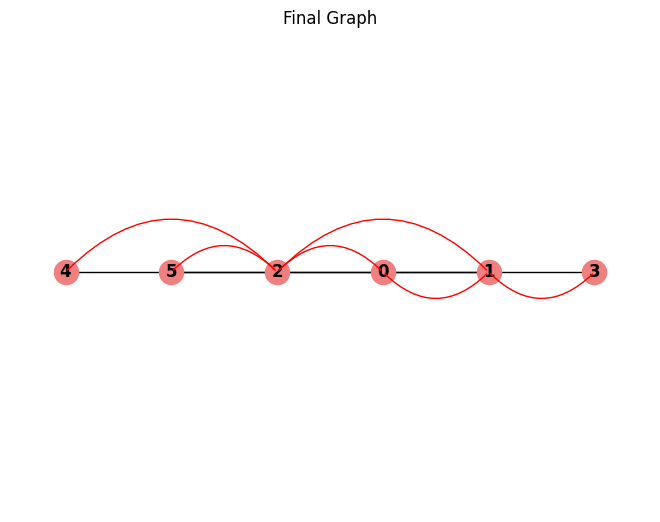

In [11]:
draw_final_graph_with_curved_edges(G, Tf)

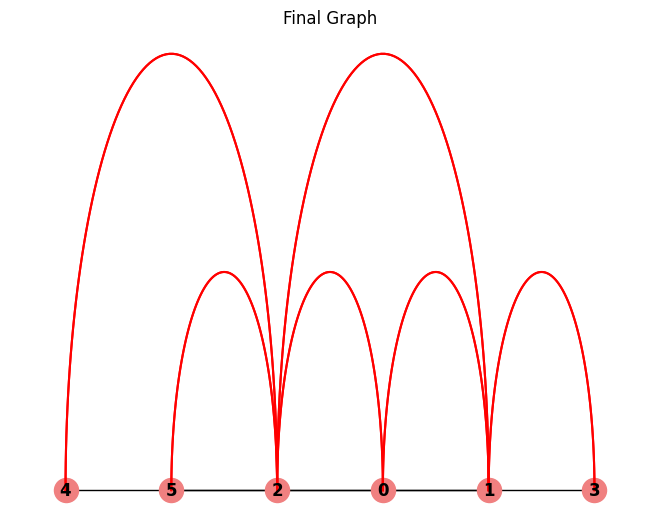

In [12]:
def draw_final_graph_with_curved_edges(graph, final_layout):
    pos = {node: (final_layout.index(node), 0) for node in final_layout}
    
    # Draw the graph with the final layout
    nx.draw(graph, pos, with_labels=True, font_weight='bold', node_color='lightcoral', font_color='black')

    # Draw arcs between each node and its neighbors
    for node in final_layout:
        neighbors = list(graph.neighbors(node))
        for neighbor in neighbors:
            pos_edge1 = np.array([pos[node][0], pos[node][1]])
            pos_edge2 = np.array([pos[neighbor][0], pos[neighbor][1]])
            
            # Calculate the center and radius
            center = ((pos_edge2[0] + pos_edge1[0]) / 2, 0)
            radius = np.abs((pos_edge2[0] - pos_edge1[0]) / 2)
            
            # Create an array of angles
            theta = np.linspace(0, np.pi, 100)
        
            x = center[0] + radius * np.cos(theta)
            y = center[1] + radius * np.sin(theta)
            
            # Plot the arc
            plt.plot(x, y, color='red')

    plt.title('Final Graph')
    plt.show()

# Example usage:
draw_final_graph_with_curved_edges(G, Tf)
